# HW07: Priority Queue
your name: Sanskruti Jadhav

In [1]:
# Note that tuples have an ordering so we can put key/value 
# pairs into a priority queue (without having to use a
# separate priority and value)

a=(1,"abc")
b=(4,"hello")
print ("a=",a," b=",b)
print (a<b, a>b, a==b)

a= (1, 'abc')  b= (4, 'hello')
True False False


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
text_kwargs = dict(ha='left', va='bottom', fontsize=10)

In [3]:
class PriorityQueue():
    '''
    An implementation of a (minimum) priority queue
    
    The arguments passed to a PriorityQueue must consist of
    objects than can be compared using <.
    Use a tuple (priority, item) if necessary.
    '''

    def __init__(self):
        self._array = []

    def push(self, obj):
        """ Add obj to the priority queue 
        and restore heap property
        """
        # append at end and bubble up:
        self._array.append( obj )
        n = len(self._array)
        self._bubble_up(n-1)
        
    def pop(self):
        """ Remove and return item with highest priority
            replacing rightmost element of lowest level and sift down
        """
        n = len(self._array)
        if n==0:
            return None
        if n==1:
            return self._array.pop()
        
        # replace with last item and sift down:
        obj = self._array[0]
        self._array[0] = self._array.pop()
        self._sift_down(0)
        return obj
    
    def _parent(self, n):
        return (n-1)//2

    def _left_child(self, n):
        return 2*n + 1

    def _right_child(self, n):
        return 2*n + 2

    def _bubble_up(self, index):
        while index>0:
            cur_item = self._array[index]
            parent_idx = self._parent(index)
            parent_item = self._array[parent_idx]
            
            if cur_item < parent_item:
                # swap with parent
                self._array[parent_idx] = cur_item
                self._array[index] = parent_item
                index = parent_idx
            else:
                break
     
    def _sift_down(self,index):
        """ check if heap property is voilated
        if voilated keep swapping recurse with swapped element
        """
        n = len(self._array)
        
        while index<n:           
            cur_item = self._array[index]
            lc = self._left_child(index)
            if n <= lc:
                break

            # first set small child to left child:
            small_child_item = self._array[lc]
            small_child_idx = lc
            
            # right exists and is smaller?
            rc = self._right_child(index)
            if rc < n:
                r_item = self._array[rc]
                if r_item < small_child_item:
                    # right child is smaller than left child:
                    small_child_item = r_item
                    small_child_idx = rc
            
            # done: we are smaller than both children:
            if cur_item <= small_child_item:
                break
            
            # swap with smallest child:
            self._array[index] = small_child_item
            self._array[small_child_idx] = cur_item
            
            # continue with smallest child:
            index = small_child_idx
        
    def size(self):
        return len(self._array)
    
    def is_empty(self):
        return len(self._array) == 0
    
    def show(self):
        plt.figure()  
        n = self.size()
        node ={}

        for index in range(n):
            
            root = self._parent(index)
            lc = self._left_child(index)
            rc = self._right_child(index)
            if root < 0 :
                root = 0
                plt.plot(n,n//3,'bo')
                plt.text(n,n//3, self._array[root],**text_kwargs)
                node[root] = [n,n//3]
                
            if lc < n :
                plt.plot(node[index][0]-(n//3)*node[index][1], node[index][1]-1,'bo')
                plt.plot((node[index][0]-(n//3)*node[index][1],node[index][0]),((node[index][1]-1),node[index][1]),'r-')
                plt.text(node[index][0]-(n//3)*node[index][1], node[index][1]-1, self._array[lc],**text_kwargs)
                node[lc] = [node[index][0]-(n//3)*node[index][1], node[index][1]-1]
                
                
            if rc < n :
                plt.plot(node[index][0]+ (n//3)* node[index][1], node[index][1]-1,'bo')
                plt.plot((node[index][0]+ (n//3)* node[index][1],node[index][0]),((node[index][1]-1),node[index][1]),'r-')
                plt.text(node[index][0]+ (n//3)* node[index][1], node[index][1]-1, self._array[rc],**text_kwargs)
                node[rc] = [node[index][0]+(n//3) * node[index][1], node[index][1]-1]
          
        plt.show()
                
    
    def heapify(self, items):
        """ Take an array of unsorted items and replace the contents
        of this priority queue by it. """
        self._array = items
        last_parent = self._parent(self.size()-1) 
        for i in range(last_parent,-1,-1) :
            self._sift_down(i)
            

    def change_priority(self, old, new):
        """ replace the item old (assumed to be in the priority queue)
        by the item new, with a different priority """
        for i in range(self.size()):
            if old == self._array[i]:
                self._array[i]=new
                break
        self.heapify(self._array)
              

yes the formulas are random :)  

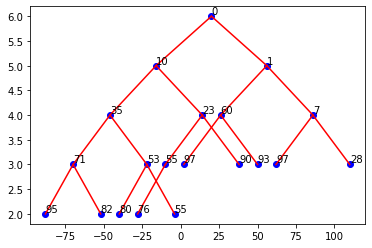

empty =  False , size =  20
array:  [0, 10, 1, 35, 23, 60, 7, 71, 53, 55, 90, 97, 93, 97, 28, 95, 82, 80, 55, 76]

in order:
0 1 7 10 23 28 35 53 55 55 60 71 76 80 82 90 93 95 97 97 
empty =  True , size =  0
array:  []


In [4]:
# small demo where we fill and empty a priority queue with random numbers

import random
pq = PriorityQueue()
for i in range(20):
    pq.push(random.randint(0,100))
    
pq.show()
print ("empty = ", pq.is_empty(), ", size = ",pq.size())
print ("array: ", pq._array)

#print(pq._left_child)

print ("\nin order:")
while not pq.is_empty():
    print (pq.pop(),end=" ")
    
print ()
print ("empty = ", pq.is_empty(), ", size = ",pq.size())
print ("array: ", pq._array)



## Question 1
Implement PriorityQueue.show() that shows a graphical representation of the tree (either using matplotlib or by formatting text and print layer by layer, indented reasonably well):

[2, 2, 5, 7, 4, 8, 9, 23, 43, 5]


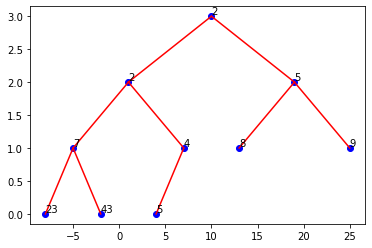

In [5]:
pq = PriorityQueue()
for i in [5,7,2,5,4,8,9,23,43,2]:
    pq.push(i)
    
print(pq._array)
pq.show()

## Question 2
You are given the following dictionary of people and their age. Use a priority queue (and no other data structure/array/...) to output their names sorted by age. Print age and name for each person in a single line.

In [6]:
names = {"Noah":4, "Jacob":7, "Mia":10, "Ava":5, "Madison":1, "Charlotte":13}
pq = PriorityQueue()
for key,value in names.items() :
    pq.push((value,key))
while(not pq.is_empty()):
    age, name = pq.pop()
    print("The age is ", age , "and name of person is " + name)


The age is  1 and name of person is Madison
The age is  4 and name of person is Noah
The age is  5 and name of person is Ava
The age is  7 and name of person is Jacob
The age is  10 and name of person is Mia
The age is  13 and name of person is Charlotte


## Question 3
Implement heapify() and test that it works using the following code.

unsorted: [10, 66, 48, 48, 22, 41, 76, 30, 42, 29, 29, 96, 62, 22, 38, 63, 80, 44, 86, 91]
in PQ: [10, 22, 22, 30, 29, 41, 38, 48, 42, 66, 29, 96, 62, 76, 48, 63, 80, 44, 86, 91]


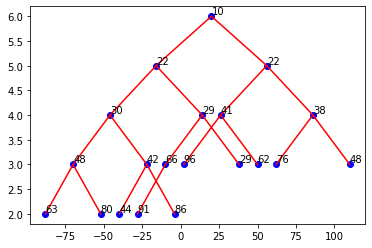

in order:
10 22 22 29 29 30 38 41 42 44 48 48 62 63 66 76 80 86 91 96 

In [7]:
import random
items = []
for i in range(20):
    items.append(random.randint(0,100))

print ("unsorted:", items)
pq = PriorityQueue()
pq.heapify(items)
print ("in PQ:", pq._array)
pq.show()

print ("in order:")
while not pq.is_empty():
    print (pq.pop(), end=" ")

## Question 4
implement change_priority() to decrease or increase the priority of an item in the priority queue. Sadly, you have to search for the item in the heap before you can change it, making the operation more expensive (please fill in below). This can be avoided (for example by storing a separate dictionary), but we are not going to discuss this here any further.

array:  [1, 5, 3, 21, 27, 55, 14, 25, 23, 43, 57, 87, 63, 78, 75, 90]


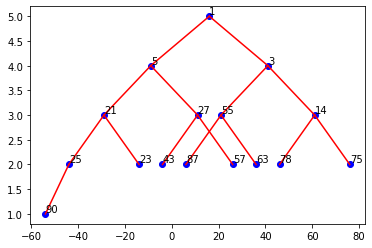

after:
array:  [1, 2, 4, 21, 5, 55, 14, 25, 23, 27, 57, 87, 63, 78, 75, 90]


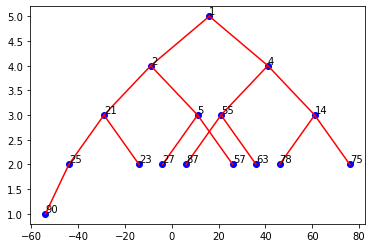

In [8]:
# the cost of change_priority() is O(n) because we:
# 1. have to search for the item first, cost O(n)
# 2. perform heapify, cost O(n)

items = [90, 25, 14, 5, 27, 63, 75, 1, 23, 43, 57, 87, 55, 78, 3, 21]
pq = PriorityQueue()
pq.heapify(items)

print ("array: ", pq._array)
pq.show()

pq.change_priority(43, 2)
pq.change_priority(3, 4)
print ("after:")
print ("array: ", pq._array)
pq.show()


## Question 5
Now similar to the name/age example before: 1) create a priority queue (this time using heapify, note that you need to create an array first) and show it, 2) change Jacob's age to 3 (using change_priority), 3) show the tree again

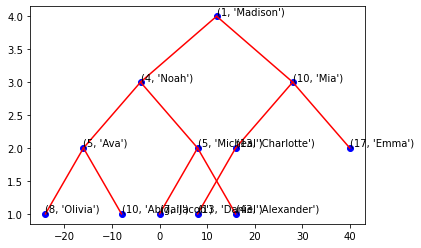

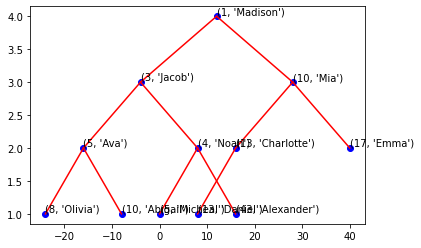

In [9]:
names = {"Noah":4, "Jacob":7, "Mia":10, "Ava":5, "Madison":1, "Charlotte":13, "Emma": 17, \
         "Olivia": 8, "Abigail": 10, "Micheal": 5, "Alexander": 43, "Daniel": 13}
pq = PriorityQueue()

ppl = [ ]
for key,value in names.items() :
    ppl.append((value,key))

pq.heapify(ppl)
pq.show()

pq.change_priority((7,"Jacob"),(3, "Jacob"))

pq.show()
